f(x) = 2.773606802147054 + 1.8701676805954335 * x1 + 1.8240735204818521 * x2


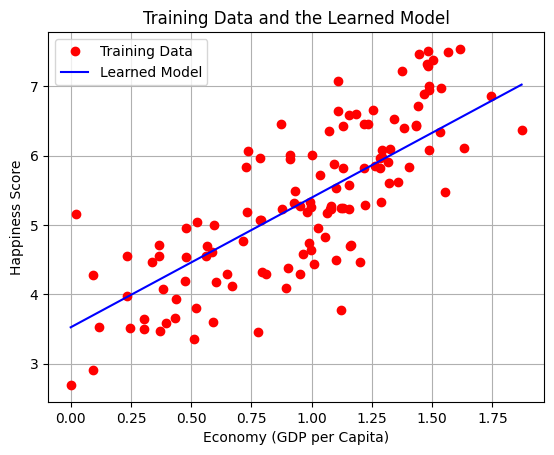

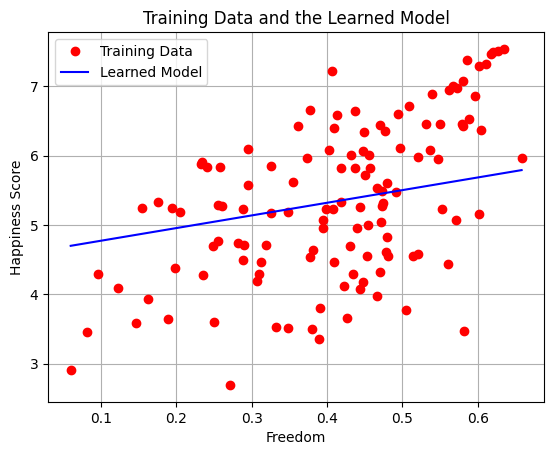

Prediction error: 0.20190418239206293


In [4]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


def load_data(file_path, input1, input2, output):
    data = []
    with open(file_path) as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        headers = next(reader)
        input1_index = headers.index(input1)
        input2_index = headers.index(input2)
        output_index = headers.index(output)
        
        for row in reader:
            if row[input1_index] and row[input2_index] and row[output_index]:
                data.append((float(row[input1_index]), float(row[input2_index]), float(row[output_index])))

    inputs1, inputs2, outputs = zip(*data)
    return list(inputs1), list(inputs2), list(outputs)


def split_data(inputs1, inputs2, outputs, train_ratio=0.8):
    np.random.seed(1)
    indexes = np.arange(len(inputs1))
    train_sample = np.random.choice(indexes, int(train_ratio * len(inputs1)), replace=False)
    validation_sample = np.setdiff1d(indexes, train_sample)

    train_inputs1 = [inputs1[i] for i in train_sample]
    train_inputs2 = [inputs2[i] for i in train_sample]
    train_outputs = [outputs[i] for i in train_sample]

    validation_inputs1 = [inputs1[i] for i in validation_sample]
    validation_inputs2 = [inputs2[i] for i in validation_sample]
    validation_outputs = [outputs[i] for i in validation_sample]

    return (train_inputs1, train_inputs2, train_outputs, 
            validation_inputs1, validation_inputs2, validation_outputs)


def train_model(train_inputs1, train_inputs2, train_outputs):
    X_train = np.column_stack((train_inputs1, train_inputs2))
    regressor = Ridge()
    regressor.fit(X_train, train_outputs)
    return regressor


def plot_results(train_inputs, train_outputs, xref, yref, xlabel):
    plt.plot(train_inputs, train_outputs, 'ro', label='Training Data')
    plt.plot(xref, yref, 'b-', label='Learned Model')
    plt.title('Training Data and the Learned Model')
    plt.xlabel(xlabel)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.grid(True)
    plt.show()


def main():
    # Load data
    crt_dir = os.getcwd()
    file_path = os.path.join(crt_dir, 'v1_world-happiness-report-2017.csv')
    inputs1, inputs2, outputs = load_data(file_path, 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')

    # Split data
    (train_inputs1, train_inputs2, train_outputs, 
     validation_inputs1, validation_inputs2, validation_outputs) = split_data(inputs1, inputs2, outputs)

    # Train model
    regressor = train_model(train_inputs1, train_inputs2, train_outputs)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print(f'f(x) = {w0} + {w1} * x1 + {w2} * x2')

    # Generate reference points for the learned model
    no_of_points = 1000
    xref1 = np.linspace(min(train_inputs1), max(train_inputs1), no_of_points)
    xref2 = np.linspace(min(train_inputs2), max(train_inputs2), no_of_points)
    yref1 = w0 + w1 * xref1 + w2 * np.mean(train_inputs2)
    yref2 = w0 + w1 * np.mean(train_inputs1) + w2 * xref2

    # Plot results for Economy (GDP per Capita)
    plot_results(train_inputs1, train_outputs, xref1, yref1, 'Economy (GDP per Capita)')

    # Plot results for Freedom
    plot_results(train_inputs2, train_outputs, xref2, yref2, 'Freedom')

    # Validate model
    X_validation = np.column_stack((validation_inputs1, validation_inputs2))
    computed_validation_outputs = regressor.predict(X_validation)
    error = mean_squared_error(validation_outputs, computed_validation_outputs)
    print(f'Prediction error: {error}')


if __name__ == '__main__':
    main()
